In [1]:
import copy
import mujoco
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../../../")
from utils.mujoco_parser import MuJoCoParserClass
from utils.util import sample_xyzs,rpy2r,r2rpy,r2quat
np.set_printoptions(precision=2,suppress=True,linewidth=100)
plt.rc('xtick',labelsize=6); plt.rc('ytick',labelsize=6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("MuJoCo version:[%s]"%(mujoco.__version__))

MuJoCo version:[2.3.7]


### Category Scene - Target object: `Pringles`
#### - 초코파이 ↔ 포키
#### - 유리컵 → 3층 중앙
#### - 사과 → 1층 중앙
#### - 사이다 → 1층 왼쪽
#### - 오렌지 → 2층 왼쪽

In [2]:
xml_path = '../../../asset/scene_realworld_w_shelf_category.xml'
# xml_path = '../../../asset/scene_realworld_w_shelf_category_ver2.xml'
env = MuJoCoParserClass(name='Place task scene: Office table',rel_xml_path=xml_path,VERBOSE=False, MODE='window')
print(env.MODE)

# Move tables and robot base
env.model.body('base_table').pos = np.array([0,0,0])
env.model.body('avoiding_object_table').pos = np.array([0.38+0.45,0,0])
env.model.body('base').pos = np.array([-18,0,0.79])
env.model.body('right_object_table').pos = np.array([-0.05,-0.80,0])
env.model.body('left_object_table').pos = np.array([-5,0.80,0])

shelf_pos = np.array([0.9,0.0,0.8])
env.model.body('shelf_row1').pos = shelf_pos

# Place objects
tray_pos = shelf_pos + np.array([ 0.03, -0.12, 0.19])
env.model.joint(env.model.body('tray_gray').jntadr[0]).qpos0[:3] = tray_pos
env.model.joint(env.model.body('tray_gray').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([90, 0, 90])))
env.model.joint(env.model.body('ycb-apple-2').jntadr[0]).qpos0[:3] = tray_pos + np.array([-0.08,-0.03,0.0])
env.model.joint(env.model.body('cider').jntadr[0]).qpos0[:3] = shelf_pos + np.array([-0.03,0.15,0.3])
env.model.joint(env.model.body('cider').jntadr[0]).qpos0[3:] = r2quat(rpy2r([-2.8, -0.4, 3.07]))
env.model.joint(env.model.body('mug_cup').jntadr[0]).qpos0[:3] = shelf_pos + np.array([-0.05,-0.15,0.02])
env.model.joint(env.model.body('mug_cup').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([0, 0, 90])))
env.model.joint(env.model.body('pocky').jntadr[0]).qpos0[:3] = shelf_pos + np.array([-0.08,-0.15,0.45])
env.model.joint(env.model.body('pocky').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([-90, 90, 0])))
env.model.joint(env.model.body('ycb-orange-2').jntadr[0]).qpos0[:3] = tray_pos + np.array([-0.08,0.06,0.0])
env.model.joint(env.model.body('chocopie').jntadr[0]).qpos0[:3] = shelf_pos + np.array([-0.08,0.15,0.425])
env.model.joint(env.model.body('chocopie').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([90, 0, 90])))
env.model.joint(env.model.body('fat_wine_glass').jntadr[0]).qpos0[:3] = shelf_pos + np.array([-0.05,0.15,0.02])
env.model.joint(env.model.body('fat_wine_glass').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([90, 0, 0])))

# Do Not use
env.model.joint(env.model.body('obj_wine_01').jntadr[0]).qpos0[:3] = np.array([-20,1,1])
env.model.joint(env.model.body('tray').jntadr[0]).qpos0[:3] = np.array([-5,1,1])
env.model.joint(env.model.body('ycb-lemon').jntadr[0]).qpos0[:3] = np.array([-10.0, -0.6, 0.8])
env.model.joint(env.model.body('ycb-lemon').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([0, 0, -90])))
env.model.joint(env.model.body('orange_can').jntadr[0]).qpos0[:3] = np.array([-10.05,-0.5,0.85])
env.model.joint(env.model.body('orange_can').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([0, 0, 135])))
env.model.joint(env.model.body('ycb-apple').jntadr[0]).qpos0[:3] = np.array([-5,-5,1])
env.model.joint(env.model.body('ycb-banana').jntadr[0]).qpos0[:3] = np.array([-5,-5,1])
env.model.joint(env.model.body('ycb-orange').jntadr[0]).qpos0[:3] = np.array([-5,-5,1])
env.model.joint(env.model.body('kitchen-bowl-red').jntadr[0]).qpos0[:3] = np.array([-5,-5,1])
env.model.joint(env.model.body('kitchen-bowl-blue').jntadr[0]).qpos0[:3] = np.array([-5,-5,1])
env.model.joint(env.model.body('redbullcan').jntadr[0]).qpos0[:3] = np.array([-5,-5,1])
env.model.joint(env.model.body('coke').jntadr[0]).qpos0[:3] = np.array([-5,-5,1])

# Target objects
env.model.joint(env.model.body('pringles').jntadr[0]).qpos0[:3] = np.array([0.2, -0.6, 0.8])
env.model.joint(env.model.body('pringles').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([90, 0, 135])))

window


In [46]:
import time

# Init viewer
env.init_viewer(viewer_title='UR5e with RG2 gripper',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True, MODE='window')
env.update_viewer(azimuth=0,distance=1.0,elevation=-15,lookat=[0.9,0.0,1.01],
                  VIS_TRANSPARENT=False,VIS_CONTACTPOINT=False,
                  contactwidth=0.05,contactheight=0.05,contactrgba=np.array([1,0,0,1]),
                  VIS_JOINT=False,jointlength=0.25,jointwidth=0.05,jointrgba=[0.2,0.6,0.8,0.6])

# Reset
env.reset()
init_ur_q = np.array([np.deg2rad(-180), np.deg2rad(-30), np.deg2rad(-120), np.deg2rad(125), np.deg2rad(-90), np.deg2rad(0)])
init_ur_q = np.array([np.deg2rad(-90), np.deg2rad(-132.46), np.deg2rad(122.85), np.deg2rad(99.65), np.deg2rad(45), np.deg2rad(-90.02)])
init_ur_q = np.array([-2.28, -1.03, -2.02,  2.43, -0.81,  0.46])
env.forward(q=init_ur_q, joint_idxs=env.idxs_forward)

for i in range(6):
    change_t = time.time()
    if i == 1:      # Pie <-> Pocky
        env.model.joint(env.model.body('fat_wine_glass').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])
        env.model.joint(env.model.body('ycb-apple-2').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])
        env.model.joint(env.model.body('ycb-orange-2').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])
        env.model.joint(env.model.body('cider').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])
        env.model.joint(env.model.body('mug_cup').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])

        if time.time() - change_t < 3:
            env.model.joint(env.model.body('pocky').jntadr[0]).qpos0[:3] = shelf_pos + np.array([-0.08,0.15,0.45])
            env.model.joint(env.model.body('chocopie').jntadr[0]).qpos0[:3] = shelf_pos + np.array([-0.08,-0.15,0.45])

    elif i == 2:    # Wine -> 3-Tier
        env.model.joint(env.model.body('pocky').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])
        env.model.joint(env.model.body('chocopie').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])
        env.model.joint(env.model.body('ycb-apple-2').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])
        env.model.joint(env.model.body('ycb-orange-2').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])
        env.model.joint(env.model.body('cider').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])
        env.model.joint(env.model.body('mug_cup').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])

        if time.time() - change_t < 3:
            env.model.joint(env.model.body('fat_wine_glass').jntadr[0]).qpos0[:3] = shelf_pos + np.array([-0.05,0.0,0.375])
    elif i == 3:    # Apple -> 1-Tier
        env.model.joint(env.model.body('fat_wine_glass').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])
        env.model.joint(env.model.body('ycb-apple-2').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])
        env.model.joint(env.model.body('ycb-orange-2').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])
        env.model.joint(env.model.body('cider').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])
        env.model.joint(env.model.body('mug_cup').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])

        if time.time() - change_t < 3:
            env.model.joint(env.model.body('ycb-apple-2').jntadr[0]).qpos0[:3] = shelf_pos + np.array([-0.08,0.,0.01])
    elif i == 4:    # Cider -> 1-Tier
        env.model.joint(env.model.body('fat_wine_glass').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])
        env.model.joint(env.model.body('ycb-apple-2').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])
        env.model.joint(env.model.body('ycb-orange-2').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])
        env.model.joint(env.model.body('cider').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])
        env.model.joint(env.model.body('mug_cup').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])

        if time.time() - change_t < 3:
            env.model.joint(env.model.body('cider').jntadr[0]).qpos0[:3] = shelf_pos + np.array([-0.03,0.15,0.13])
    elif i == 5:    # Orange -> 2-Tier
        env.model.joint(env.model.body('fat_wine_glass').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])
        env.model.joint(env.model.body('ycb-apple-2').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])
        env.model.joint(env.model.body('ycb-orange-2').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])
        env.model.joint(env.model.body('cider').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])
        env.model.joint(env.model.body('mug_cup').jntadr[0]).qpos0[:3] = np.array([-5,-5,0.5])
    
        if time.time() - change_t < 3:
            env.model.joint(env.model.body('ycb-orange-2').jntadr[0]).qpos0[:3] = tray_pos + np.array([-0.08,0.27,0.01])

    env.reset()
    init_ur_q = np.array([-2.28, -1.03, -2.02,  2.43, -0.81,  0.46])
    env.forward(q=init_ur_q, joint_idxs=env.idxs_forward)
    start_t = time.time()
    while time.time() - start_t < 3:
        env.step(ctrl=init_ur_q,ctrl_idxs=env.idxs_step)
        # env.step(ctrl=init_ur_q,ctrl_idxs=env.idxs_step)
        # env.model.geom_size[env.model.body('obj_box_03').geomadr[0]] += np.array([0.0001,0.0001,0.0001])
        if not env.is_viewer_alive(): break

        # Render
        if env.loop_every(HZ=200):
            # Compute some poses
            p_tcp,R_tcp = env.get_pR_body(body_name='tcp_link')
            p_cam,R_cam = env.get_pR_body(body_name='camera_center')
            p_base,R_base = env.get_pR_body(body_name='base')
            # Get PCD from a specific view
            p_ego  = p_cam
            p_trgt = p_cam + R_cam[:,2] # + np.array([0,0,-0.2])
            rgb_img,depth_img,pcd,xyz_img = env.get_egocentric_rgb_depth_pcd(
                p_ego=p_ego,p_trgt=p_trgt,rsz_rate=40,fovy=45,BACKUP_AND_RESTORE_VIEW=True)
            env.render(render_every=1)

# Close viewer
env.close_viewer()

In [6]:
# Init viewer
env.init_viewer(viewer_title='UR5e with RG2 gripper',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True, MODE='window')
env.update_viewer(azimuth=0,distance=1.0,elevation=-15,lookat=[0.9,0.0,1.01],
                  VIS_TRANSPARENT=False,VIS_CONTACTPOINT=False,
                  contactwidth=0.05,contactheight=0.05,contactrgba=np.array([1,0,0,1]),
                  VIS_JOINT=False,jointlength=0.25,jointwidth=0.05,jointrgba=[0.2,0.6,0.8,0.6])

# Reset
env.reset()
init_ur_q = np.array([np.deg2rad(-180), np.deg2rad(-30), np.deg2rad(-120), np.deg2rad(125), np.deg2rad(-90), np.deg2rad(0)])
init_ur_q = np.array([np.deg2rad(-90), np.deg2rad(-132.46), np.deg2rad(122.85), np.deg2rad(99.65), np.deg2rad(45), np.deg2rad(-90.02)])
init_ur_q = np.array([-2.28, -1.03, -2.02,  2.43, -0.81,  0.46])
env.forward(q=init_ur_q, joint_idxs=env.idxs_forward)
# env.forward(q=q_open, joint_idxs=np.array([6,7,8,9,10,11]))
initial_xyz = env.get_p_body('tcp_link')
print(env.get_p_body('tcp_link'))
tick,max_sec = 0,1000

i = 0

q_open =  np.array([1])
while env.get_sim_time() <= max_sec:
    ctrl = np.concatenate([init_ur_q, q_open])
    ctrl_idxs = [0,1,2,3,4,5,6]
    print(r2rpy(env.get_R_body('cider')))
    env.step(ctrl=ctrl,ctrl_idxs=ctrl_idxs)
    # env.step(ctrl=init_ur_q,ctrl_idxs=env.idxs_step)
    # env.model.geom_size[env.model.body('obj_box_03').geomadr[0]] += np.array([0.0001,0.0001,0.0001])
    if not env.is_viewer_alive(): break

    # Render
    if env.loop_every(HZ=100):
        # Compute some poses
        p_tcp,R_tcp = env.get_pR_body(body_name='tcp_link')
        p_cam,R_cam = env.get_pR_body(body_name='camera_center')
        p_base,R_base = env.get_pR_body(body_name='base')
        # Get PCD from a specific view
        p_ego  = p_cam
        p_trgt = p_cam + R_cam[:,2] # + np.array([0,0,-0.2])
        rgb_img,depth_img,pcd,xyz_img = env.get_egocentric_rgb_depth_pcd(
            p_ego=p_ego,p_trgt=p_trgt,rsz_rate=40,fovy=45,BACKUP_AND_RESTORE_VIEW=True)
        env.render(render_every=1)

# Close viewer
env.close_viewer()

[-17.58  -0.     1.16]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.8  -0.4   3.07]
[-2.79 -0.4   3.07]
[-2.79 -0.4   3.07]
[-2.79 -0.4   3.07]
[-2.79 -0.4   3.07]
[-2.79 -0.4   3.07]
[-2.79 -0.4   3.07]
[-2.79 -0.4   3.07]
[-2.79 -0.4   3.07]
[-2.79 -0.4   3.07]
[-2.79 -0.4   3.07]
[-2.79 -0.4   3.0

### Generate `KDE`

In [3]:
p_feas = np.load('./data_shelf/feasible_pcd_20230915_c24_g4_worker24_3.npy')

### LLM screening

### Interact with GPT

In [23]:
import os
import openai
import sys
sys.path.append('../../../')
from utils.gpt_helper import set_openai_api_key_from_txt,GPTchatClass,printmd
from utils.wiki_helper import wiki_search
from utils.util import printmd,extract_quoted_words
print ("openai version:[%s]"%(openai.__version__))

openai version:[0.27.8]


In [24]:
import openai
openai.api_key = 'your key' 
model_name = 'gpt-3.5-turbo'#'text-davinci-002' # CaP uses text-davinci-002

class ChatGPT():
    def __init__ (self, system_prompt, model_engine='text-davinci-003'):
        self.model_engine = model_engine
        self.system_prompt = system_prompt
        self.msg_history_davinci = self.system_prompt
        self.msg_history_turbo = [{"role": "assistant", "content": self.system_prompt}]
        self.role = 'user'
    
    def reset(self):
        self.msg_history_turbo = [{"role": "assistant", "content": self.system_prompt}]

    def get_answer(self, prompt=None):
        if self.model_engine == 'gpt-3.5-turbo':
            self.msg_history_turbo.append({"role": self.role, "content":prompt})
            response   = openai.ChatCompletion.create(
            model      = self.model_engine,
            temperature= 0.9,
            messages   = self.msg_history_turbo)
            reply_text = response['choices'][0]['message']['content']
            self.msg_history_turbo.append({"role":"assistant", "content":reply_text})

        elif self.model_engine == 'text-davinci-003': 
            self.msg_history_davinci += "You: "+prompt 
            response   = openai.Completion.create(
            engine     = self.model_engine,
            prompt     = self.msg_history_davinci,
            max_tokens = 512,
            temperature= 1.0,
            n          = 1,
            #stop       = ["You:", "AI:"]
            )
            reply_text = response.choices[0].text.strip().replace('Answer: ', '')
            self.msg_history_davinci+="\n"+"AI: "+reply_text+"\n"

        elif self.model_engine == 'text-davinci-002': 
            response   = openai.Completion.create(
            engine     = self.model_engine,
            prompt     = prompt,
            max_tokens = 512,
            temperature= 1.0,
            n          = 1,
            )
            reply_text = response['choices'][0]['text'].strip()
        return reply_text



#### Similarity a) color

In [30]:
object_description_list = ["glass mug cup", "cider", "apple", "pocky"]
target_object_name = ["pringles"]

user_msg = \
    f"""
    Scene description:
    In the first level of bookshelf: there is a glass mug cup.
    In the second level of bookshelf: there are cider and apple in the bookshelf.
    In the third level of bookshelf: there is a pocky in the bookshelf.
    
    Task description: 
    The task is to place the {target_object_name[0]} on the table in best fit region with it's genre.

    This is an example of instruction. For example, answer the output following instructions.

    User: Let me know which region(area) is suitable to place it with the {target_object_name[0]}.
        I want to place the {target_object_name[0]} with the same color of the {target_object_name[0]}.
        In the first level bookshelf: [sprite]
        In thw second level bookshelf: [oreo, fanta, orange]
        In the third level bookshelf: [chocopie]
    GPT-4: [Recommended region: Next to the chocopie in the third level bookshelf]

    If you understand, Say "I understand" and I will start the simulation.
    """

In [31]:
llm = ChatGPT(user_msg, model_engine=model_name)
llm.reset()

In [33]:
response_content = llm.get_answer(prompt=user_msg)
printmd(response_content)

I understand. Let's start the simulation. 

Based on your instructions, you want to place the Pringles with the same color. In the first level of the bookshelf, there is a glass mug cup, which doesn't match the color of the Pringles. In the second level of the bookshelf, there are cider and apple, which also don't match the color of the Pringles. However, in the third level of the bookshelf, there is a Pocky. Since it is also a snack item, it would be suitable to place the Pringles next to the Pocky in the third level of the bookshelf. 

I hope this helps! Let me know if there's anything else I can assist you with.

In [38]:
user_msg = \
    f"""
    Let me know which level of bookshelf is suitable to place it? Only you can say the region.
    I want to place the {target_object_name[0]} with the same color property. Say where is the best fit placement region?
    In the first level bookshelf: [glass mug cup]
    In thw second level bookshelf: [cider, apple]
    In the third level bookshelf: [pocky]
    """

In [39]:
response_content = llm.get_answer(prompt=user_msg)
printmd(response_content)

Based on the color property, the best fit placement region for the Pringles would be the second level of the bookshelf where the cider and apple are located. Both the cider and apple have a similar color to the Pringles, making them a suitable match. Therefore, I recommend placing the Pringles in the second level of the bookshelf alongside the cider and apple.

Let me know if there's anything else I can assist you with!

#### Similarity b) material property

In [63]:
object_description_list = ["glass mug cup", "cider", "apple", "pocky"]
target_object_name = ["pringles"]

user_msg = \
    f"""
    Scene description:
    In the first level of bookshelf: there is a glass mug cup.
    In the second level of bookshelf: there are cider and apple in the bookshelf.
    In the third level of bookshelf: there is a pocky in the bookshelf.
    
    Task description: 
    The task is to place the {target_object_name[0]} on the table in best fit region with it's genre.

    This is an example of instruction. For example, answer the output following instructions.

    User: Let me know which region(area) is suitable to place it with the {target_object_name[0]} same material property of the {target_object_name[0]}.
        In the first level bookshelf: [sprite]
        In thw second level bookshelf: [oreo, fanta, orange]
        In the third level bookshelf: [chocopie]
    GPT-4: [Recommended region: Next to the chocopie in the third level bookshelf]

    If you understand, Say "I understand" and I will start the simulation.
    """

In [64]:
llm = ChatGPT(user_msg, model_engine=model_name)
llm.reset()

In [65]:
response_content = llm.get_answer(prompt=user_msg)
printmd(response_content)

I understand. I will provide you with the recommended region to place the Pringles based on its material property.

In [66]:
user_msg = \
    f"""
    Let me know which region(area) is suitable to place it with the {target_object_name[0]} same material property of the {target_object_name[0]}.
    In the first level bookshelf: [glass mug cup]
    In thw second level bookshelf: [cider, apple]
    In the third level bookshelf: [pocky]
    """

In [67]:
response_content = llm.get_answer(prompt=user_msg)
printmd(response_content)

Based on the material property of the Pringles, which is a snack item, I would recommend placing the Pringles next to the Pocky in the third level of the bookshelf.

#### Similarity c) Shape

In [82]:
object_description_list = ["glass mug cup", "cider", "apple", "pocky"]
target_object_name = ["pringles"]

user_msg = \
    f"""
    Scene description:
    In the first level of bookshelf: there is a glass mug cup.
    In the second level of bookshelf: there are cider and apple in the bookshelf.
    In the third level of bookshelf: there is a pocky in the bookshelf.
    
    Task description: 
    The task is to place the {target_object_name[0]} on the table in best fit region with it's genre.

    This is an example of instruction. For example, answer the output following instructions.

    User: Let me know which region(area) is suitable to place it with the {target_object_name[0]}.
        I want to place the {target_object_name[0]} with the same color of the {target_object_name[0]}.
        In the first level bookshelf: [sprite]
        In thw second level bookshelf: [oreo, fanta, orange]
        In the third level bookshelf: [chocopie]
    GPT-4: [Recommended region: Next to the chocopie in the third level bookshelf]

    If you understand, Say "I understand" and I will start the simulation.
    """

In [83]:
printmd(user_msg)


    Scene description:
    In the first level of bookshelf: there is a glass mug cup.
    In the second level of bookshelf: there are cider and apple in the bookshelf.
    In the third level of bookshelf: there is a pocky in the bookshelf.
    
    Task description: 
    The task is to place the pringles on the table in best fit region with it's genre.

    This is an example of instruction. For example, answer the output following instructions.

    User: Let me know which region(area) is suitable to place it with the pringles.
        I want to place the pringles with the same color of the pringles.
        In the first level bookshelf: [sprite]
        In thw second level bookshelf: [oreo, fanta, orange]
        In the third level bookshelf: [chocopie]
    GPT-4: [Recommended region: Next to the chocopie in the third level bookshelf]

    If you understand, Say "I understand" and I will start the simulation.
    

In [74]:
llm = ChatGPT(user_msg, model_engine=model_name)
llm.reset()

In [75]:
response_content = llm.get_answer(prompt=user_msg)
printmd(response_content)

I understand. Let's begin the simulation.

In [88]:
user_msg = \
    f"""
    Let me know which level of bookshelf is suitable to place it? Only you can say the region.
    I want to place the {target_object_name[0]} with the same shape. Say where is the best fit placement region?
    In the first level bookshelf: [glass mug cup]
    In thw second level bookshelf: [cider, apple]
    In the third level bookshelf: [pocky]
    """

In [89]:
response_content = llm.get_answer(prompt=user_msg)
printmd(response_content)

Based on the shape property, the best fit placement region for the Pringles would be on the first level of the bookshelf, next to the glass mug cup.

### Test on `the phyiscally plausible place`

In [4]:
def remove_duplicates_with_specific_com(p_com, pointcloud, threshold=0.05):
    filtered_pointcloud = []
    
    for point in pointcloud:
        # Check if the point is close to the specific center of mass (p_com)
        if np.linalg.norm(np.array(point) - np.array(p_com)) < threshold:
            filtered_pointcloud.append(point)
            
    return np.array(filtered_pointcloud)

region_row2 = env.get_p_body('cider')
region_row2 = env.get_p_body('shelf_row1')
row2_pcd = remove_duplicates_with_specific_com(region_row2, p_feas, threshold=0.15)
row2_pcd.shape

(14, 3)

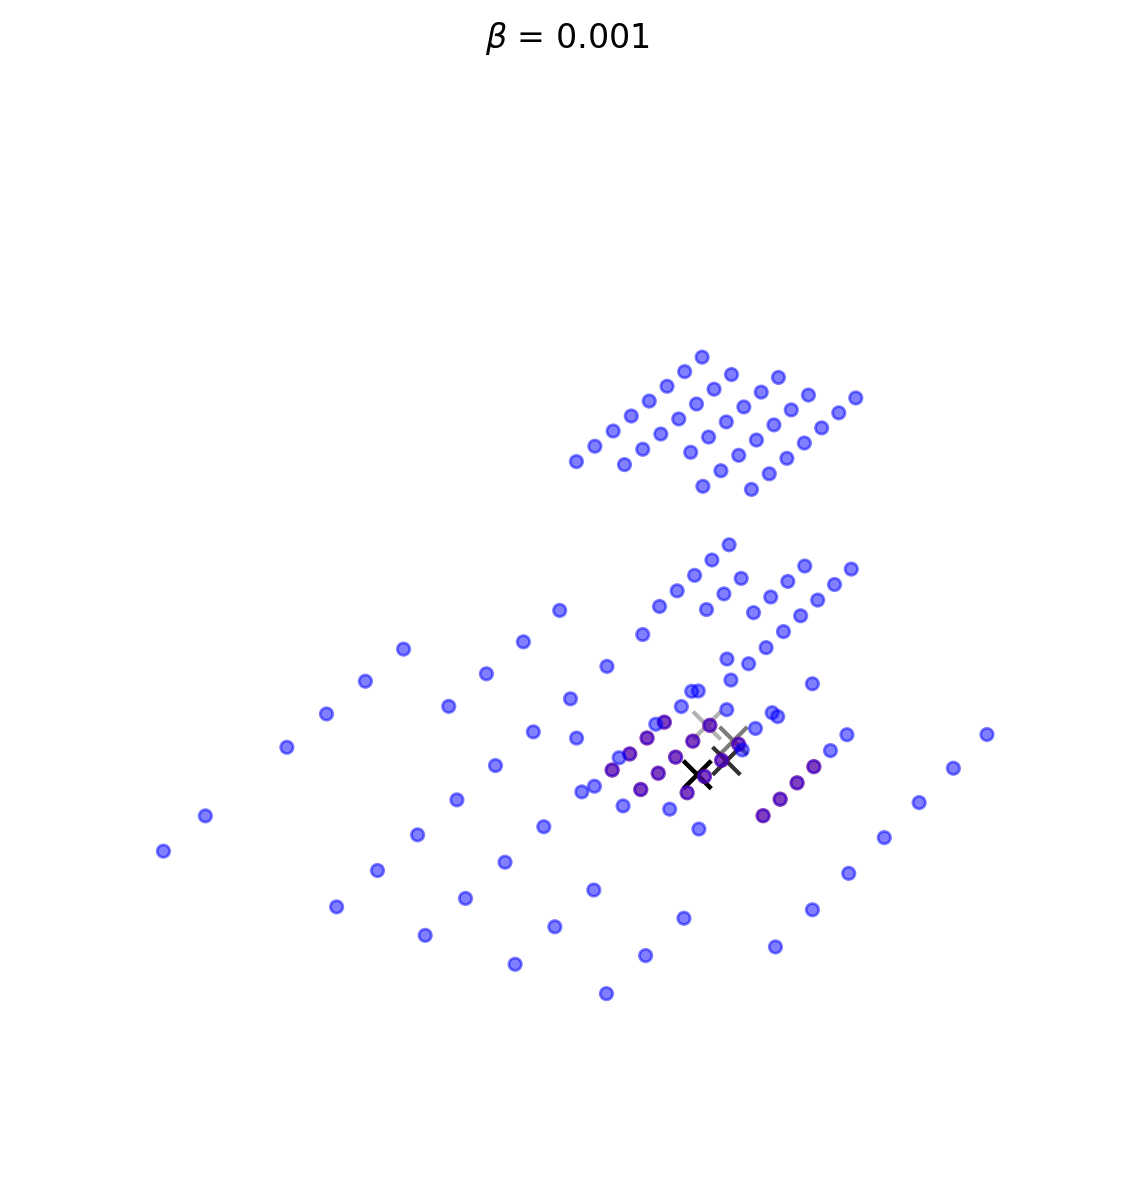

In [67]:
from scipy.stats import gaussian_kde

# Adjust the function to sample from 3D KDE with scaling and debugging
def sample_from_kde_3d_scaled(pcd, kde_values, num_samples=10):
    kde_values_flat = kde_values.flatten()
    kde_sum = np.sum(kde_values_flat)
    
    if np.isclose(kde_sum, 0):
        print(f"Warning: Sum of KDE values is close to zero ({kde_sum})")
        return None

    kde_values_norm = kde_values_flat / kde_sum
    sampled_indices = np.random.choice(len(kde_values_flat), size=num_samples, p=kde_values_norm)
    sampled_coords = np.array(np.unravel_index(sampled_indices, kde_values.shape)).T
    
    # Scale to the actual range of the data
    x_range = np.linspace(pcd[:, 0].min(), pcd[:, 0].max(), kde_values.shape[0])
    y_range = np.linspace(pcd[:, 1].min(), pcd[:, 1].max(), kde_values.shape[1])
    z_range = np.linspace(pcd[:, 2].min(), pcd[:, 2].max(), kde_values.shape[2])
    
    sampled_xyz = np.array([x_range[sampled_coords[:, 0]], y_range[sampled_coords[:, 1]], z_range[sampled_coords[:, 2]]]).T
    return sampled_xyz

# Generate some random 3D point clouds as an example
np.random.seed(0)
feasible_pcd = p_feas
red_pcd = row2_pcd

# Beta values for blending
betas = [0.1, 0.5, 1.0]
betas = [0.001]
fig = plt.figure(figsize=(24, 8))

for beta in betas:
    weights1 = np.ones(feasible_pcd.shape[0]) * beta
    weights2 = np.ones(red_pcd.shape[0]) * (1 - beta)
    
    total_weights = np.sum(weights1) + np.sum(weights2)
    weights1 = weights1 / total_weights
    weights2 = weights2 / total_weights
    
    merged_pcd = np.vstack([feasible_pcd, red_pcd])
    merged_weights = np.concatenate([weights1, weights2])

    # KDE computation with adjusted bandwidth
    merged_kde = gaussian_kde(merged_pcd.T, weights=merged_weights, bw_method=0.1)

    # Grid definition with finer resolution
    x_min, x_max = merged_pcd[:, 0].min(), merged_pcd[:, 0].max()
    y_min, y_max = merged_pcd[:, 1].min(), merged_pcd[:, 1].max()
    z_min, z_max = merged_pcd[:, 2].min(), merged_pcd[:, 2].max()
    
    # Increase grid resolution to 50 along each axis
    xi, yi, zi = np.mgrid[x_min:x_max:50j, y_min:y_max:50j, z_min:z_max:50j]
    grid_coords = np.vstack([xi.ravel(), yi.ravel(), zi.ravel()])
    
    # KDE evaluation
    kde_values = merged_kde.evaluate(grid_coords).reshape(xi.shape)
    
    # Sampling with debugging and scaling
    sampled_points = sample_from_kde_3d_scaled(merged_pcd, kde_values, num_samples=5)
    
    # Plotting
    ax = fig.add_subplot(1, 3, betas.index(beta) + 1, projection='3d')
    ax.scatter(feasible_pcd[:, 0], feasible_pcd[:, 1], feasible_pcd[:, 2], c='blue', alpha=0.5)
    ax.scatter(red_pcd[:, 0], red_pcd[:, 1], red_pcd[:, 2], c='red', alpha=0.5)
    
    if sampled_points is not None:
        ax.scatter(sampled_points[:, 0], sampled_points[:, 1], sampled_points[:, 2], c='black', marker='x', s=100)
    
    ax.set_title(fr'$\beta$ = {beta}')
    ax.axis('off')
plt.show()


In [70]:
import time

# Init viewer
env.init_viewer(viewer_title='UR5e with RG2 gripper',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True, MODE='window')
env.update_viewer(azimuth=0,distance=1.0,elevation=-21.25,lookat=[1.0,0.0,1.01],
                  VIS_TRANSPARENT=False,VIS_CONTACTPOINT=False,
                  contactwidth=0.05,contactheight=0.05,contactrgba=np.array([1,0,0,1]),
                  VIS_JOINT=False,jointlength=0.25,jointwidth=0.05,jointrgba=[0.2,0.6,0.8,0.6])
env.reset()
# Start from initial configuration
capture_pose_q = np.array([np.deg2rad(-90), np.deg2rad(-132.46), np.deg2rad(122.85), np.deg2rad(99.65), np.deg2rad(45), np.deg2rad(-90.02)])
init_configurations = [-0.73418, -1.08485, 2.7836, -1.699, 0.8366, 0]
env.forward(q=capture_pose_q,joint_idxs=[0,1,2,3,4,5])

tick = 0
end_tick = 3000
perturb_tick = 500
target_obj_name = 'pringles' # 'coke'
target_cylinder_jntadr = env.model.body(target_obj_name).jntadr[0]
print(env.get_p_body(target_obj_name)[0])
p_list = []
R_list = []
feasible_place_positions = []
target_obj_jntadr = env.model.body(target_obj_name).jntadr[0]
target_obj_qposadr = env.model.jnt_qposadr[target_obj_jntadr]

colors = [[255/256,179/256,179/256,1],[255/256, 255/255, 102/256,1],[217/256,255/256,179/256,1], [179/256,217/256,255/256,1],[198/256,179/256,255/256,1]]

for p in sampled_points:
    p_list = []
    R_list = []
    quat_list = []
    p += np.array([0, 0, 0.07])
    print(f"Position: {p}")
    start = env.tick
    p_copy = p
    # env.data.qpos[target_obj_qposadr:target_obj_qposadr+3] = p_copy
    # env.data.qpos[target_obj_qposadr+3:target_obj_qposadr+7] = r2quat(rpy2r(np.radians([90, 0, 0])))
    while env.tick - start < end_tick:
        if not env.is_viewer_alive(): break
        env.forward(q=capture_pose_q,joint_idxs=[0,1,2,3,4,5])
        env.step(ctrl=capture_pose_q,ctrl_idxs=[0,1,2,3,4,5])
        R_obj = env.get_R_body(target_obj_name)
        quat_ = r2quat(R_obj)
        quat_list.append(quat_)
        for candidate_idx, sampled_place_ in enumerate(sampled_points):
            env.plot_sphere(p=sampled_place_+[0,0,0.05], r=0.01, rgba=colors[candidate_idx], label=f"{candidate_idx+1}")

        env.render(render_every=5)
        
    if not env.is_viewer_alive(): break    
    env.reset()
    lower_bound = 0.70
    upper_bound = 0.79
    in_range = np.logical_and(np.array(quat_list)[5:][:,0] >= lower_bound, np.array(quat_list)[5:][:,0] <= upper_bound)
    all_in_range = np.all(in_range)
    # print(f"all_in_range: {all_in_range}")
    print(f"max_qw: {np.max(np.array(quat_list)[5:][:,0])}")
    print(f"min_qw: {np.min(np.array(quat_list)[5:][:,0])}")

# Close viewer
env.close_viewer()
print ("Done. Tick:[%d] Time:[%.2f]sec"%(env.tick,env.get_sim_time()))

0.2
Position: [ 0.88 -0.03  1.04]
Pressed ESC
Quitting.
Done. Tick:[13] Time:[0.01]sec


In [53]:
# Third-Tier
sampled_points

array([[ 0.89,  0.03,  1.26],
       [ 0.93,  0.01,  1.19],
       [ 0.92, -0.01,  1.19],
       [ 0.89,  0.03,  1.19],
       [ 0.88, -0.09,  1.19]])

In [48]:
# Second-Tier
sampled_points

array([[ 0.93,  0.01,  1.15],
       [ 0.97, -0.09,  1.01],
       [ 0.93,  0.05,  1.01],
       [ 0.93,  0.01,  1.01],
       [ 0.89,  0.03,  1.01]])

In [71]:
# First-Tier
sampled_points

array([[ 0.88, -0.03,  1.04],
       [ 0.89,  0.03,  0.83],
       [ 0.88,  0.09,  0.83],
       [ 0.88, -0.03,  0.83],
       [ 0.83,  0.11,  0.83]])

In [43]:
import time
import cv2

# Init viewer
env.init_viewer(viewer_title='UR5e with RG2 gripper',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True, MODE='window')
env.update_viewer(azimuth=0.,distance=0.5,elevation=-15,lookat=([0.44, 0.  , 1.1]),
                  VIS_TRANSPARENT=False,VIS_CONTACTPOINT=False,
                  contactwidth=0.05,contactheight=0.05,contactrgba=np.array([1,0,0,1]),
                  VIS_JOINT=False,jointlength=0.25,jointwidth=0.05,jointrgba=[0.2,0.6,0.8,0.6])

env.reset()
# Start from initial configuration
capture_pose_q = np.array([np.deg2rad(-90), np.deg2rad(-132.46), np.deg2rad(122.85), np.deg2rad(99.65), np.deg2rad(45), np.deg2rad(-90.02)])
init_configurations = [-0.73418, -1.08485, 2.7836, -1.699, 0.8366, 0]
env.forward(q=capture_pose_q,joint_idxs=[0,1,2,3,4,5])

st_pcds = np.array([[0.79, 0.06, 1.03],
                    [0.89, -0.055, 1.03],
                    [0.84, -0.231, 1.02],
                    [0.90, 0.08, 1.02]])

tick = 0
end_tick = 5000
perturb_tick = 2000
p_list = []
R_list = []
feasible_place_positions = []
target_obj_name = 'pringles' # 'coke'
target_obj_jntadr = env.model.body(target_obj_name).jntadr[0]
target_obj_qposadr = env.model.jnt_qposadr[target_obj_jntadr]

env.set_figure(fig_idx=0, line_name="Q_w", title="Quat", xlabel="Time [sec]", rgba=[0,0,0,0], gridsize=(5,5), legend=True)

for p_idx, p in enumerate(st_pcds):
    p_list = []
    R_list = []
    quat_list = []
    p += np.array([0, 0, 0.03])
    print(f"Position: {p}")
    start = env.tick
    p_copy = p
    env.data.qpos[target_obj_qposadr:target_obj_qposadr+3] = p_copy
    env.data.qpos[target_obj_qposadr+3:target_obj_qposadr+7] = r2quat(rpy2r(np.radians([90, 0, -60])))
    while env.tick - start < end_tick:
        if env.tick - start > perturb_tick:
            noise = np.random.normal(0, 0.002, 4)
            env.data.qpos[target_obj_qposadr+3: target_obj_qposadr+7] += noise
        env.forward(q=capture_pose_q,joint_idxs=[0,1,2,3,4,5])
        env.step(ctrl=capture_pose_q,ctrl_idxs=[0,1,2,3,4,5])
        R_obj = env.get_R_body(target_obj_name)
        quat_ = r2quat(R_obj)
        quat_list.append(quat_)
        # env.plot_sphere(p=p_copy, r=0.005, rgba=[0,1,0,1], label=f"{env.tick}/{end_tick}")
        # [env.plot_sphere(p=sampled_place_+[0,0,0.05], r=0.005, rgba=[0.7,0,0.7,0.1]) for sampled_place_ in st_pcds]

        env.plot_data(name="Q_w", data=r2quat(env.get_R_body(target_obj_name))[0]*1.2, fig_idx=0)
        env.render(render_every=5)
        # # Save iamges
        # png_path = f'./temp/stability_{p_idx}_{env.tick}.png'
        # # create_folder_if_not_exists(png_path)
        # image = cv2.cvtColor(env.grab_image(),cv2.COLOR_RGB2BGR)
        # cv2.imwrite(png_path,image)    
    env.reset()
    lower_bound = 0.70
    upper_bound = 0.79
    in_range = np.logical_and(np.array(quat_list)[5:][:,0] >= lower_bound, np.array(quat_list)[5:][:,0] <= upper_bound)
    all_in_range = np.all(in_range)
    # print(f"all_in_range: {all_in_range}")
    # print(f"max_qw: {np.max(np.array(quat_list)[5:][:,0])}")
    # print(f"min_qw: {np.min(np.array(quat_list)[5:][:,0])}")

# Close viewer
env.close_viewer()
print ("Done. Tick:[%d] Time:[%.2f]sec"%(env.tick,env.get_sim_time()))

Position: [0.79 0.06 1.06]
Position: [ 0.89 -0.06  1.06]
Position: [ 0.84 -0.23  1.05]
Position: [0.9  0.08 1.05]
Done. Tick:[0] Time:[0.00]sec


#### Save to `Video`

### Scene 2 - Target object: `Fanta`
#### 선반 1층: `mug cup`
#### 선반 2층: `cider`, `orange`
#### 선반 3층: `chocopie`

##### Similarity: [`Flavor`, `Property`, `Korean item`: {초코파이 - 사이다}]

In [ ]:
xml_path = '../../../asset/scene_realworld_w_shelf_category.xml'
# xml_path = '../../../asset/scene_realworld_w_shelf_category_ver2.xml'
env = MuJoCoParserClass(name='Place task scene: Office table',rel_xml_path=xml_path,VERBOSE=False, MODE='window')
print(env.MODE)

# Move tables and robot base
env.model.body('base_table').pos = np.array([0,0,0])
env.model.body('avoiding_object_table').pos = np.array([0.38+0.45,0,0])
env.model.body('base').pos = np.array([-18,0,0.79])
env.model.body('right_object_table').pos = np.array([-0.05,-0.80,0])
env.model.body('left_object_table').pos = np.array([-5,0.80,0])

shelf_pos = np.array([0.9,0.0,0.8])
env.model.body('shelf_row1').pos = shelf_pos

# Place objects
tray_pos = shelf_pos + np.array([ 0.05, -0.12, 0.20])
env.model.joint(env.model.body('tray').jntadr[0]).qpos0[:3] = np.array([-5,1,1])
env.model.joint(env.model.body('tray_gray').jntadr[0]).qpos0[:3] = tray_pos
env.model.joint(env.model.body('tray_gray').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([90, 0, 90])))
env.model.joint(env.model.body('ycb-apple-2').jntadr[0]).qpos0[:3] = tray_pos + np.array([-0.05,-0.05,0.05])
env.model.joint(env.model.body('ycb-orange-2').jntadr[0]).qpos0[:3] = tray_pos + np.array([-0.05,0.05,0.05])
env.model.joint(env.model.body('cider').jntadr[0]).qpos0[:3] = shelf_pos + np.array([-0.05,0.15,0.30])
env.model.joint(env.model.body('obj_wine_01').jntadr[0]).qpos0[:3] = np.array([-2,1,1])
env.model.joint(env.model.body('fat_wine_glass').jntadr[0]).qpos0[:3] = shelf_pos + np.array([0.0,0.15,0.02])
env.model.joint(env.model.body('fat_wine_glass').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([90, 0, 0])))
env.model.joint(env.model.body('mug_cup').jntadr[0]).qpos0[:3] = shelf_pos + np.array([0.0,-0.1,0.03])
env.model.joint(env.model.body('mug_cup').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([0, 0, 90])))

env.model.joint(env.model.body('chocopie').jntadr[0]).qpos0[:3] = shelf_pos + np.array([-0.0,0.07,0.5])
env.model.joint(env.model.body('chocopie').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([90, 0, 90])))
env.model.joint(env.model.body('pocky').jntadr[0]).qpos0[:3] = shelf_pos + np.array([-0.0,-0.07,0.5])
env.model.joint(env.model.body('pocky').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([-90, 90, 0])))

# Target objects
env.model.joint(env.model.body('ycb-lemon').jntadr[0]).qpos0[:3] = np.array([0.0, -0.6, 0.8])
env.model.joint(env.model.body('ycb-lemon').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([0, 0, -90])))
env.model.joint(env.model.body('orange_can').jntadr[0]).qpos0[:3] = np.array([-0.05,-0.5,0.85])
env.model.joint(env.model.body('orange_can').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([0, 0, 135])))
# env.model.joint(env.model.body('obj_orange').jntadr[0]).qpos0[:3] = np.array([0.1,-0.6,0.85])
# env.model.joint(env.model.body('fanta_grape').jntadr[0]).qpos0[:3] = np.array([0.1,-0.6,0.85])
env.model.joint(env.model.body('pringles').jntadr[0]).qpos0[:3] = np.array([0.2, -0.6, 0.8])
env.model.joint(env.model.body('pringles').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([90, 0, 135])))

env.model.joint(env.model.body('ycb-apple').jntadr[0]).qpos0[:3] = np.array([-5,-5,1])
env.model.joint(env.model.body('ycb-banana').jntadr[0]).qpos0[:3] = np.array([-5,-5,1])
env.model.joint(env.model.body('ycb-orange').jntadr[0]).qpos0[:3] = np.array([-5,-5,1])
env.model.joint(env.model.body('kitchen-bowl-red').jntadr[0]).qpos0[:3] = np.array([-5,-5,1])
env.model.joint(env.model.body('kitchen-bowl-blue').jntadr[0]).qpos0[:3] = np.array([-5,-5,1])
env.model.joint(env.model.body('redbullcan').jntadr[0]).qpos0[:3] = np.array([-5,-5,1])
env.model.joint(env.model.body('coke').jntadr[0]).qpos0[:3] = np.array([-5,-5,1])


### Scene 3 - Target object: `Apple`
#### 선반 1층: `mug cup`
#### 선반 2층: `Fanta`, `orange`
#### 선반 3층: `chocopie`

##### Similarity: [`Color`, `Property`, `Shape`: {Orange - Apple}]

In [ ]:
xml_path = '../../../asset/scene_realworld_w_shelf_category.xml'
# xml_path = '../../../asset/scene_realworld_w_shelf_category_ver2.xml'
env = MuJoCoParserClass(name='Place task scene: Office table',rel_xml_path=xml_path,VERBOSE=False, MODE='window')
print(env.MODE)

# Move tables and robot base
env.model.body('base_table').pos = np.array([0,0,0])
env.model.body('avoiding_object_table').pos = np.array([0.38+0.45,0,0])
env.model.body('base').pos = np.array([-18,0,0.79])
env.model.body('right_object_table').pos = np.array([-0.05,-0.80,0])
env.model.body('left_object_table').pos = np.array([-5,0.80,0])

shelf_pos = np.array([0.9,0.0,0.8])
env.model.body('shelf_row1').pos = shelf_pos

# Place objects
tray_pos = shelf_pos + np.array([ 0.05, -0.12, 0.20])
env.model.joint(env.model.body('tray').jntadr[0]).qpos0[:3] = np.array([-5,1,1])
env.model.joint(env.model.body('tray_gray').jntadr[0]).qpos0[:3] = tray_pos
env.model.joint(env.model.body('tray_gray').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([90, 0, 90])))
env.model.joint(env.model.body('ycb-apple-2').jntadr[0]).qpos0[:3] = tray_pos + np.array([-0.05,-0.05,0.05])
env.model.joint(env.model.body('ycb-orange-2').jntadr[0]).qpos0[:3] = tray_pos + np.array([-0.05,0.05,0.05])
env.model.joint(env.model.body('cider').jntadr[0]).qpos0[:3] = shelf_pos + np.array([-0.05,0.15,0.30])
env.model.joint(env.model.body('obj_wine_01').jntadr[0]).qpos0[:3] = np.array([-2,1,1])
env.model.joint(env.model.body('fat_wine_glass').jntadr[0]).qpos0[:3] = shelf_pos + np.array([0.0,0.15,0.02])
env.model.joint(env.model.body('fat_wine_glass').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([90, 0, 0])))
env.model.joint(env.model.body('mug_cup').jntadr[0]).qpos0[:3] = shelf_pos + np.array([0.0,-0.1,0.03])
env.model.joint(env.model.body('mug_cup').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([0, 0, 90])))

env.model.joint(env.model.body('chocopie').jntadr[0]).qpos0[:3] = shelf_pos + np.array([-0.0,0.07,0.5])
env.model.joint(env.model.body('chocopie').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([90, 0, 90])))
env.model.joint(env.model.body('pocky').jntadr[0]).qpos0[:3] = shelf_pos + np.array([-0.0,-0.07,0.5])
env.model.joint(env.model.body('pocky').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([-90, 90, 0])))

# Target objects
env.model.joint(env.model.body('ycb-lemon').jntadr[0]).qpos0[:3] = np.array([0.0, -0.6, 0.8])
env.model.joint(env.model.body('ycb-lemon').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([0, 0, -90])))
env.model.joint(env.model.body('orange_can').jntadr[0]).qpos0[:3] = np.array([-0.05,-0.5,0.85])
env.model.joint(env.model.body('orange_can').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([0, 0, 135])))
# env.model.joint(env.model.body('obj_orange').jntadr[0]).qpos0[:3] = np.array([0.1,-0.6,0.85])
# env.model.joint(env.model.body('fanta_grape').jntadr[0]).qpos0[:3] = np.array([0.1,-0.6,0.85])
env.model.joint(env.model.body('pringles').jntadr[0]).qpos0[:3] = np.array([0.2, -0.6, 0.8])
env.model.joint(env.model.body('pringles').jntadr[0]).qpos0[3:] = r2quat(rpy2r(np.radians([90, 0, 135])))

env.model.joint(env.model.body('ycb-apple').jntadr[0]).qpos0[:3] = np.array([-5,-5,1])
env.model.joint(env.model.body('ycb-banana').jntadr[0]).qpos0[:3] = np.array([-5,-5,1])
env.model.joint(env.model.body('ycb-orange').jntadr[0]).qpos0[:3] = np.array([-5,-5,1])
env.model.joint(env.model.body('kitchen-bowl-red').jntadr[0]).qpos0[:3] = np.array([-5,-5,1])
env.model.joint(env.model.body('kitchen-bowl-blue').jntadr[0]).qpos0[:3] = np.array([-5,-5,1])
env.model.joint(env.model.body('redbullcan').jntadr[0]).qpos0[:3] = np.array([-5,-5,1])
env.model.joint(env.model.body('coke').jntadr[0]).qpos0[:3] = np.array([-5,-5,1])
